In [354]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import re

In [355]:
res_glob = glob.glob('./*synthethic*.csv*')
res_glob_names = [val.split('/')[-1] for val in res_glob]

In [356]:
res_glob

['./regression_synthethic_data.csv', './classification_synthethic_data.csv']

In [391]:
lst_dfs = [f for f in res_glob_names]

In [392]:
lst_dfs = [pd.read_csv(f) for f in res_glob_names]

In [393]:
df_full = pd.concat(lst_dfs)

In [394]:
df_full.dataset.unique()

array(['regr_features_10_samples_100_seed_0',
       'regr_features_10_samples_1000_seed_0',
       'regr_features_10_samples_10000_seed_0',
       'regr_features_100_samples_1000_seed_0',
       'regr_features_100_samples_10000_seed_0',
       'classif_features_10_samples_100_seed_0',
       'classif_features_10_samples_1000_seed_0',
       'classif_features_10_samples_10000_seed_0',
       'classif_features_100_samples_1000_seed_0',
       'classif_features_100_samples_10000_seed_0'], dtype=object)

In [395]:
df_full

,dataset,imp_type,random_state,data_split,fi_order,fi_selected,timings
0,regr_features_10_samples_100_seed_0,mutual_info,0,0,"[0, 1, 6, 3, 8, 7, 4, 2, 5, 9]","[0, 1]",[0.0136933 0.0122165 0.0132788 0.01470369 0...
1,regr_features_10_samples_100_seed_0,f_test,0,0,"[0, 1, 6, 9, 8, 4, 2, 3, 5, 7]","[0, 1]",[0.001821 0.00179793 0.00162894 0.00153707 0...
2,regr_features_10_samples_100_seed_0,pearson,0,0,"[0, 1, 6, 9, 8, 4, 2, 3, 5, 7]","[0, 1]",[0.00230209 0.00175082 0.00193131 0.00205105 0...
3,regr_features_10_samples_100_seed_0,spearman,0,0,"[0, 1, 6, 8, 4, 9, 2, 3, 7, 5]","[0, 1]",[0.00247468 0.00336982 0.00261929 0.0022625 0...
4,regr_features_10_samples_100_seed_0,kendall,0,0,"[0, 1, 6, 8, 4, 9, 2, 3, 7, 5]","[0, 1]",[0.01518707 0.01486127 0.01474847 0.0148518 0...
...,...,...,...,...,...,...,...
415,classif_features_10_samples_1000_seed_0,shap,0,5,"[1, 0, 8, 6, 3, 7, 9, 2, 4, 5]","[1, 0]",[0.47895326 0.43472769 0.43348402 0.43308727 0...
416,classif_features_10_samples_1000_seed_0,shap,0,6,"[1, 0, 6, 5, 7, 4, 9, 2, 8, 3]","[1, 0]",[0.43566127 0.43838538 0.43530704 0.43629178 0...
417,classif_features_10_samples_1000_seed_0,shap,0,7,"[1, 0, 6, 8, 3, 9, 5, 4, 2, 7]","[1, 0]",[0.38790095 0.38092548 0.3806996 0.3822947 0...
418,classif_features_10_samples_1000_seed_0,shap,0,8,"[1, 0, 3, 5, 8, 9, 7, 2, 6, 4]","[1, 0]",[0.44764364 0.43974558 0.43852804 0.4382532 0...


In [361]:
# elem = re.findall("\d+\.\d+", test)

# np.array([float(i) for i in elem])

# test = df_full.iloc[0].timings

In [396]:
def str_to_float(arr):
    floats_str = re.findall("\d+\.\d+", arr)
    floats = [float(i) for i in floats_str]
    return np.array(floats)

In [397]:
def cast_to_int(arr):
    digits_str = re.findall('\d{1,2}', arr)
    digits_int = [int(i) for i in digits_str]
#     info_found = np.array([1 if i <= info_cnt else 0 for i in digits_int]).sum()
    return digits_int

In [398]:
def count_sel_info(arr, info_cnt):
    digits_str = re.findall('\d{1,2}', arr)
    digits_int = [int(i) for i in digits_str]
    info_found = np.array([1 if i <= info_cnt else 0 for i in digits_int]).sum()
    return info_found

In [399]:
df_full['feature_cnt'] = df_full.dataset.to_string().split('_')[2]
df_full['info_feature_cnt'] = df_full.dataset.apply(lambda x: x.split('_')[2])
df_full['info_feature_cnt'] = df_full['info_feature_cnt'].astype('int') * 0.2
df_full['cnt_info2'] = df_full.fi_selected.apply(count_sel_info, args={1})
df_full['cnt_info20'] = df_full.fi_selected.apply(count_sel_info, args={19})

In [400]:
df_full['timings_float'] = df_full.timings.apply(str_to_float)

In [401]:
df_full['features_found'] = np.where(df_full.info_feature_cnt > 2.0, df_full.cnt_info20, df_full.cnt_info2)

In [402]:
df_full['features_found_pct'] = df_full.features_found / df_full.info_feature_cnt

In [403]:
df_full['sample_size'] = df_full.dataset.str.split('_').str[4]

In [404]:
df_full['features'] = df_full.dataset.str.split('_').str[2]

In [405]:
df_full['timings_mean'] = df_full.timings_float.apply(np.mean)

In [406]:
df_full['sample_feature_size'] = 'samples_' + df_full.sample_size +'_'+ 'features_' +df_full.features

In [407]:
df_full[['dataset', 'data_split', 'imp_type', 'features_found', 'info_feature_cnt', 'features_found_pct']]

,dataset,data_split,imp_type,features_found,info_feature_cnt,features_found_pct
0,regr_features_10_samples_100_seed_0,0,mutual_info,2,2.0,1.0
1,regr_features_10_samples_100_seed_0,0,f_test,2,2.0,1.0
2,regr_features_10_samples_100_seed_0,0,pearson,2,2.0,1.0
3,regr_features_10_samples_100_seed_0,0,spearman,2,2.0,1.0
4,regr_features_10_samples_100_seed_0,0,kendall,2,2.0,1.0
...,...,...,...,...,...,...
415,classif_features_10_samples_1000_seed_0,5,shap,2,2.0,1.0
416,classif_features_10_samples_1000_seed_0,6,shap,2,2.0,1.0
417,classif_features_10_samples_1000_seed_0,7,shap,2,2.0,1.0
418,classif_features_10_samples_1000_seed_0,8,shap,2,2.0,1.0


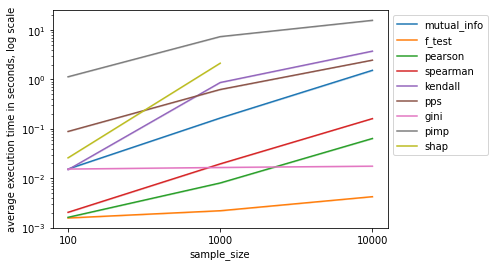

In [435]:
plot = sns.lineplot(x='sample_size', y='timings_mean', hue='imp_type', ci=0,
            data=df_full)

plot.set_ylabel('average execution time in seconds, log scale')
plot.set_yscale("log")
plot.legend(bbox_to_anchor= (1,1))
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

In [436]:
fig = plot.get_figure()

fig.savefig('misc/synthethic_execbysamplesize_log.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'average execution time in seconds, linear scale')

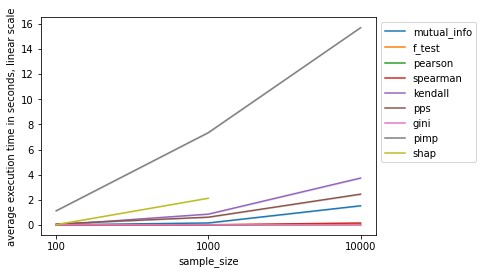

In [437]:
plot = sns.lineplot(x='sample_size', y='timings_mean', hue='imp_type', ci=0,
            data=df_full)
plot.legend(bbox_to_anchor= (1,1))
plot.set_ylabel('average execution time in seconds, linear scale')

In [438]:
fig = plot.get_figure()

fig.savefig('misc/synthethic_execbysamplesize_lin.png', dpi=300, bbox_inches='tight')

In [247]:
# plot = sns.barplot(x='features', y='timings_mean', hue='imp_type', ci=95,
#             data=df_full)
# plot.set_ylabel('execution time in log scale')
# plot.set_yscale("log")
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

In [312]:
speed_eval = df_full.query('sample_size == "10000" and features == "100"')

In [313]:
speed_eval = speed_eval[['dataset', 'imp_type', 'timings_float', 'timings_mean']]

In [314]:
speed_eval = speed_eval.groupby('imp_type').mean().reset_index()

In [333]:
speed_eval.to_csv('results_synthethic_data/synthethic_speed_eval.csv', index=False)

In [442]:
speed_eval.sort_values('timings_mean')

,imp_type,timings_mean
0,f_test,0.006296
1,gini,0.017717
4,pearson,0.124424
7,spearman,0.312715
3,mutual_info,2.784574
6,pps,4.482986
2,kendall,7.398635
5,pimp,29.003301


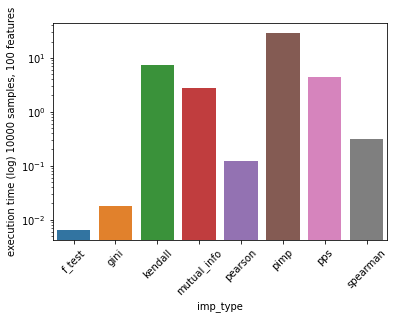

In [439]:
plot = sns.barplot(x='imp_type', y='timings_mean', ci=95,
            data=speed_eval)

plot.set_ylabel('execution time (log) 10000 samples, 100 features')
plot.set_yscale("log")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

fig = plot.get_figure()

fig.savefig('misc/synthethic_imp_type_10000samples_100features.png', dpi=300, bbox_inches='tight')

In [420]:
res = df_full.groupby(['imp_type']).mean().features_found_pct

In [421]:
res = res.reset_index(); 

In [425]:
res.columns = ['imp_type', 'average_features_found_pct']

In [447]:
res.sort_values('average_features_found_pct', ascending=False)

,imp_type,average_features_found_pct
5,pimp,0.9255
1,gini,0.9090
7,shap,0.8750
8,spearman,0.7480
2,kendall,0.7475
0,f_test,0.7435
4,pearson,0.7435
3,mutual_info,0.6070
6,pps,0.0630


In [343]:
res.to_csv('results_synthethic_data/synthethic_accuracy_eval.csv', index=False)

In [70]:
# df_full.iloc[185:][['dataset', 'fi_selected', 'features_found', 'features_found_pct', 'info_feature_cnt']]